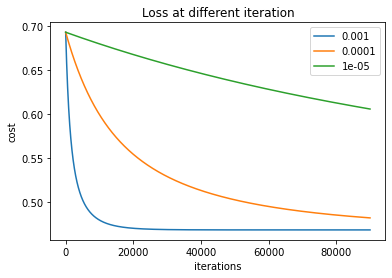

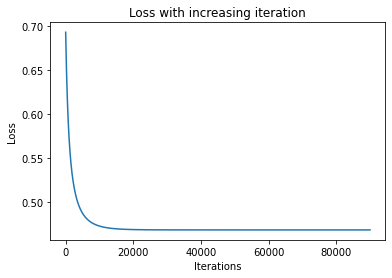

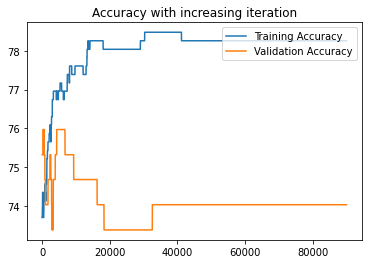

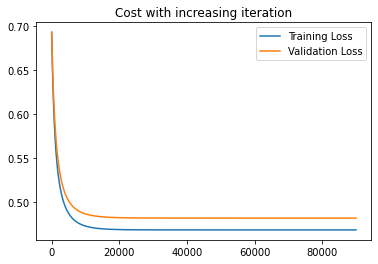

Train data
Accuracy:  78.26 %
Test data
Accuracy:  81.82 %
Validation data
Accuracy:  75.32 %
Epoch 1/40
8/8 [==============================] - 1s 28ms/step - loss: 0.6646 - accuracy: 0.6000 - val_loss: 0.6322 - val_accuracy: 0.6883
Epoch 2/40
8/8 [==============================] - 0s 6ms/step - loss: 0.6508 - accuracy: 0.6500 - val_loss: 0.5913 - val_accuracy: 0.6883
Epoch 3/40
8/8 [==============================] - 0s 5ms/step - loss: 0.6380 - accuracy: 0.6391 - val_loss: 0.5728 - val_accuracy: 0.7338
Epoch 4/40
8/8 [==============================] - 0s 6ms/step - loss: 0.6109 - accuracy: 0.6848 - val_loss: 0.5459 - val_accuracy: 0.7468
Epoch 5/40
8/8 [==============================] - 0s 6ms/step - loss: 0.5910 - accuracy: 0.6913 - val_loss: 0.5300 - val_accuracy: 0.7468
Epoch 6/40
8/8 [==============================] - 0s 6ms/step - loss: 0.5861 - accuracy: 0.6804 - val_loss: 0.5372 - val_accuracy: 0.7662
Epoch 7/40
8/8 [==============================] - 0s 6ms/step - loss: 0.5686 

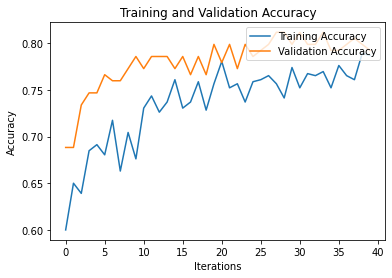

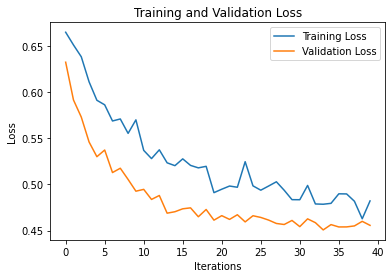

In [7]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mp
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import SGD, Adam
import tensorflow as tf
import pandas as pd
from tensorflow import keras

########################################################------Part1----------####################################################################
#Reading the data of the file
filename="diabetes.csv"
Data=pd.read_csv(filename)

#Checking the data of diabetes file
#Data.head()
#print(Data)
#Data.shape


#for x  and y values  refing the data to get the features and outcome
x=pd.DataFrame(Data.iloc[:,:-1])
y=pd.DataFrame(Data.iloc[:,-1:])
Data["Outcome"].value_counts()

#Taking only values of data excluding the names
x=x.values
y=y.values


#Taking standard scaler of independent variable x
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x= scaler.transform(x)


#Importing train_test_split function from sklearns to split data into train, test and validation.
from sklearn.model_selection import train_test_split
Dia_x_train,Dia_x_rem,Dia_y_train,Dia_y_rem=train_test_split(x,y,train_size=0.6,random_state=7)
Dia_x_valid,Dia_x_test,Dia_y_valid,Dia_y_test=train_test_split(Dia_x_rem,Dia_y_rem, test_size=0.5,random_state=7)



#Changing the shape of variable according to  for train, test and validation data 
Dia_x_train=Dia_x_train.T
Dia_x_rem=Dia_x_rem.T
Dia_x_test=Dia_x_test.T
Dia_x_valid=Dia_x_valid.T
Dia_y_train = Dia_y_train.reshape(1, Dia_x_train.shape[1])
Dia_y_test = Dia_y_test.reshape(1, Dia_x_test.shape[1])
Dia_y_rem = Dia_y_rem.reshape(1, Dia_x_rem.shape[1])
Dia_y_valid = Dia_y_valid.reshape(1, Dia_x_valid.shape[1])

#To calculate of the train , test and valid data accuracy
def accuracy_data(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    A = sig(Z)
    m =  np.shape(A)[1]

    for i in range (m) :
        if(A[0][i]>0.5):
            A[0][i]=1
        else:
            A[0][i]=0
            
    A = np.array(A, dtype = 'int64')
    a = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    return round(a, 2)  



#Defining sigmoid function
def sig(z):
    return (1/(1+np.exp(-z)))


#Defining COST function  to calculate cost 
def costF(Dia_x_train,Dia_y_train , learning_rate, iterations):
    
    m = Dia_x_train.shape[1]
    n = Dia_x_train.shape[0]
    
    
    #print(m)
    W = np.zeros((n,1))
    B = 0
    
    cost_list = []
    accuracy=[]
    
    for i in range(iterations):
        
        z=np.dot(W.T, Dia_x_train) +B
        A = sig(z)
        cost=-(1/m)*(np.sum( Dia_y_train*np.log(A) + (1-Dia_y_train)*np.log(1-A)))
        
        dW=(1/m)*np.dot(A-Dia_y_train,Dia_x_train.T)  
        dB=(1/m)*np.sum(A-Dia_y_train)
        
        
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        
        
        cost_list.append(cost)
        
        
        accuracy.append(accuracy_data(Dia_x_train,Dia_y_train,W,B))
    return W, B, cost_list,accuracy
        

#Calculate graph for different iteration.
def graph(Dia_x_train, Dia_y_train):
    ilist=[.001,.0001,.00001]
    for i in ilist:
        W, B, costFunctn, accuracy= costF(Dia_x_train, Dia_y_train, i, iterations = 90000)
        plt.plot(np.squeeze(costFunctn),label = str(i))
    plt.ylabel('cost')
    plt.xlabel('iterations')
    plt.title('Loss at different iteration')
    plt.legend()
    plt.show()
        

#Calling cost function
iterations = 90000
learning_R = 0.0015

W_train, B_train, costFunctn_train, accuracy_train = costF(Dia_x_train, Dia_y_train, learning_R, iterations)
W_val, B_val, costFunctn_val, accuracy_val = costF(Dia_x_valid, Dia_y_valid, learning_R, iterations)

#Ploting Graph 
graph(Dia_x_train, Dia_y_train)
plt.plot(np.arange(iterations), costFunctn_train)
plt.title('Loss with increasing iteration')
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.show()

plt.plot(np.arange(iterations), accuracy_train)
plt.plot(np.arange(iterations), accuracy_val)
plt.title('Accuracy with increasing iteration')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper right')
plt.show()

plt.plot(np.arange(iterations), costFunctn_train )
plt.plot(np.arange(iterations), costFunctn_val)
plt.title('Cost with increasing iteration')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()






#To calculate of the train , test and valid data accuracy
def accuracy_data1(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    A = sig(Z)
    m =  np.shape(A)[1]

    for i in range (m) :
        if(A[0][i]>0.5):
            A[0][i]=1
        else:
            A[0][i]=0
            
    A = np.array(A, dtype = 'int64')
    a = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    print("Accuracy: ", round(a, 2), "%") 
      
    
    
    
print("Train data")
x1=accuracy_data1(Dia_x_train, Dia_y_train, W_train, B_train)
print("Test data")
y1=accuracy_data1(Dia_x_test, Dia_y_test, W_train, B_train)
print("Validation data")
z1=accuracy_data1(Dia_x_valid, Dia_y_valid, W_train, B_train) 



#################################################################-------Part2----------------###########################################################

#Creating function for  neural network

# Neural Network with 3 Hidden Layers.

"""model = Sequential()
model.add(Dense(64, activation='relu', input_dim=8,kernel_regularizer = keras.regularizers.l1(.01)))  # Hidden layer.

model.add(Dense(256, activation='relu',kernel_regularizer=keras.regularizers.l2(.01))) # Hidden layer.

model.add(Dense(128, activation='relu',kernel_regularizer=keras.regularizers.l1_l2(.01,.001))) # Hidden layer.

model.add(Dense(1, activation='sigmoid'))  


model.compile(optimizer=SGD(learning_rate=0.09), loss='binary_crossentropy', metrics=['accuracy'])"""

#For only drop out
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=8))  # Hidden layer.

model.add(tf.keras.layers.Dropout(.5))
model.add(Dense(256, activation='relu')) # Hidden layer.

model.add(tf.keras.layers.Dropout(.5))
model.add(Dense(128, activation='relu')) # Hidden layer.

model.add(tf.keras.layers.Dropout(.5))
model.add(Dense(1, activation='sigmoid'))  



model.compile(optimizer=SGD(learning_rate=0.09), loss='binary_crossentropy', metrics=['accuracy'])




history = model.fit(Dia_x_train.T,  Dia_y_train.T, validation_data=(Dia_x_test.T, Dia_y_test.T), epochs=40, batch_size=64)

# Evaluating the model
loss2, accuracy2 = model.evaluate(Dia_x_train.T, Dia_y_train.T)
loss1, accuracy1 = model.evaluate(Dia_x_valid.T, Dia_y_valid.T)
loss, accuracy = model.evaluate(Dia_x_test.T, Dia_y_test.T)
accuracy=round(accuracy*100,2)
accuracy1=round(accuracy1*100,2)
accuracy2=round(accuracy2*100,2)
print('\n\n Loss_train', loss2, 'Accuracy_train:', accuracy2,"%")

print('\n\n Loss_test', loss, 'Accuracy_test:', accuracy, "%")

print('\n\n Loss_validation', loss1, 'Accuracy_valid:', accuracy1,"%")

# Accuracy 0f Neural Network

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper right')
plt.show()



# Loss of neural network
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

